### **Objective:**
Our topic is Loan Approval Rates and how certain variables such as Education, Marriage status,and the requested loan amount can influence the end goal of getting the loan approved. We are going to use a data set from Kaggle that will need to be cleaned and then have regressions doneon it to determine which variables are deemed important. We intend to add to the code we source by implementing code that will give us an easier and visual way to represent the data as well as implementing code to run the cleansed data and generate visual graphs to show the trends of variables. Our success measures will be whether we can create a presentation that easily shows the results of each variable on the Approval of loans as well as having a working code to submit by the end of the project

## Importing necessary libraries and overview of the dataset - Add libraries as needed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,0,128,66,120,141
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [ ]:
data.shape

(614, 13)

In [ ]:
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

There are missing values in Gender,Marrried,Dependents,Self_Employed,Loan_Amount_Term and Credit_History. We can either delete these records or imputate them with appropriate values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Above number shows number of missing values for respective columns.

In [ ]:
data.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Above values shows % data missing in respective columns. Credit history is missing percentage values at 8.14%.

In [ ]:
data.duplicated().sum()

0

There are no duplicated rows in the data set.

In [ ]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

 - There are 614 unique values in Loan_ID every row has different Loan ID value and this column has no impact on target variable being a system generated value to identify each row.
 - Applicant income,coapplicant income,loan amount and Loan amount term being numerical variable high number of unique values.

### Statistical Summary:

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


- Applicant income has large range of about **80000** from minimum value of **150 to 81000** as maximum value.
- Loan Amount term has dicrete values as it represents number period of months of loan.
- Loan Amount has **zero** as minimum value which seems odd, it might reflect incorrect data input.
- Applicant income mean is at **5,403** where as the max value is at **81,000**
- Most people take loan in the range of **141** average, max value is at **700**

- Applicant Income, Coapplicant Income, Loan Amount, Loan Amount Term are skewed as evident from their differences in mean and median values.
- Other 2 columns are categorical columns.

Loan_ID can be removed, as mentioned earlier its not contributing to target value prediction.


In [ ]:
data.drop('Loan_ID',axis=1,inplace=True)

**Segregating the numerical and categorical column values**

In [ ]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [ ]:
data[num_cols]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,0,360.0
1,4583,1508.0,128,360.0
2,3000,0.0,66,360.0
3,2583,2358.0,120,360.0
4,6000,0.0,141,360.0
...,...,...,...,...
609,2900,0.0,71,360.0
610,4106,0.0,40,180.0
611,8072,240.0,253,360.0
612,7583,0.0,187,360.0


In [ ]:
data[cat_cols]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,1.0,Rural,1
611,Male,Yes,1,Graduate,No,1.0,Urban,1
612,Male,Yes,2,Graduate,No,1.0,Urban,1


In [ ]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Loan Amount term has dicrete values with 360 months being the popular option for loan term.

### Missing Data Handling
We will impute the missing values with mean/median or mode instead of removing them.
 - For categorical columns we will use mode for imputation
 - For numerical columns we will use median or mean.

In [ ]:

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
print(data['Loan_Amount_Term'].median())
print(data['Loan_Amount_Term'].mean())

360.0
342.0


We impute with median as the data is skewed.

In [ ]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no missing values in our dataset now.

Loan_Amount_term  - 14 missing values, being a numerical column we can replace with either mean or median value

In [ ]:
data[cat_cols].isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

Missing values for Gender,married,dependents,Self_employed,credit_history, we can replace them with mode of the colums or delete the missing columns

In [ ]:
data[cat_cols].nunique()

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
Loan_Status       2
dtype: int64

### Exploratory Data Analysis - EDA

**Univariate Analysis**

Creating and analyzing Numerical and Categorical variables with Graph and Tables

In [ ]:
for i in cat_cols:
    print(data[i].value_counts(normalize=True)*100)
    print('*'*4)

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64
****
Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64
****
Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64
****
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64
****
Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64
****
Credit_History
1.0    85.504886
0.0    14.495114
Name: proportion, dtype: float64
****
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64
****
Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64
****


 - There are about **82**% male in the data
 - About **65** % people are married
 - Most applicants have no dependents in their family, implying they are very young individuals
 - About **78**% people are graduate level education.
 - Only **13**% people are selfemployed
 - Many people about **85**% , have good credit history
 - There is relatively uniform distribution for property area type.


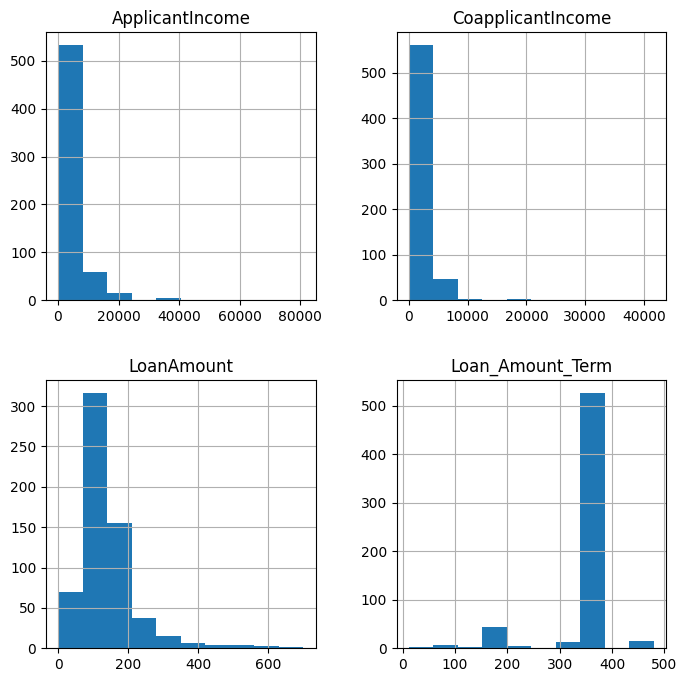

In [ ]:
data[num_cols].hist(figsize=(8,8))
plt.show()

 - All the numerical columns are heavily skewed.
 - Applicant Income, coapplicant income,Loan Amount are right skewed which means all parameters have most values in the lower ranges
 - Loan Amount term is left skewed or bimodal to some extend, which means most values of these parameters are in the high range.
 - We will plot kde plot to further understand the distribution.

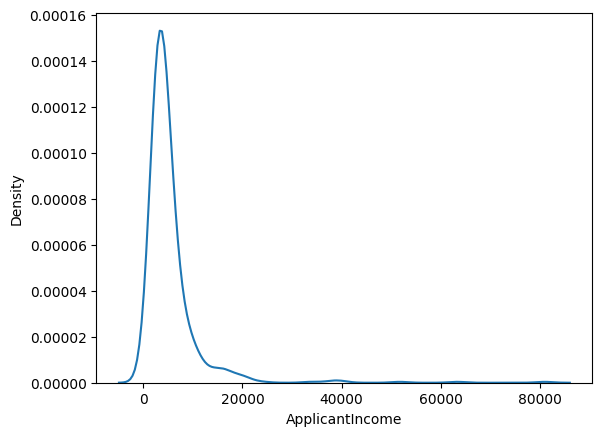

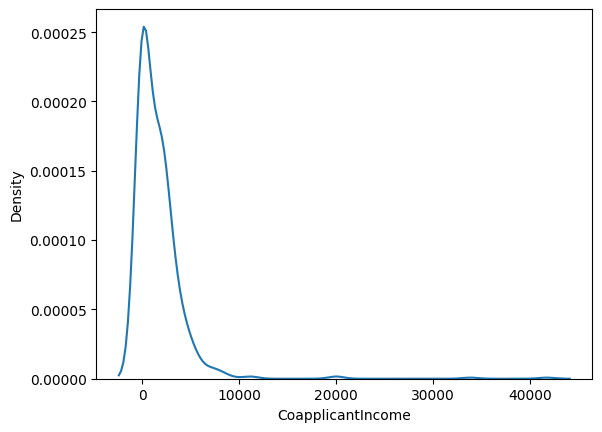

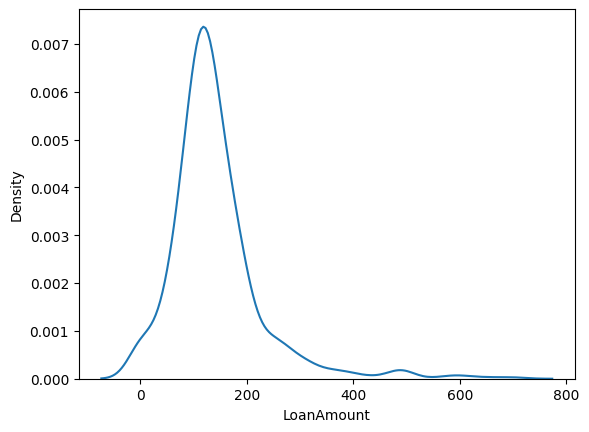

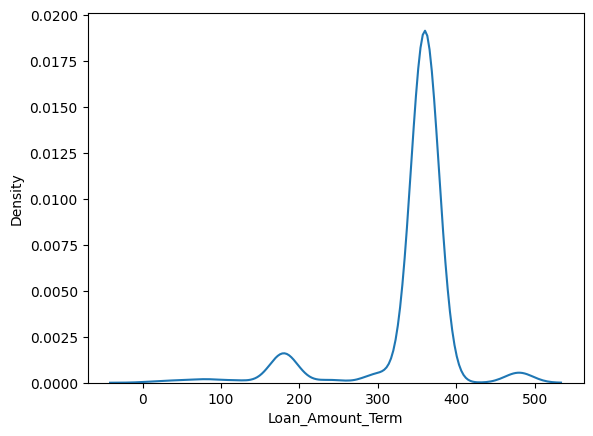

In [ ]:
import seaborn as sns
for i in num_cols:
  sns.kdeplot(data=data,x=i,gridsize=200)
  plt.show()

We will create boxplots to check for outliers in the numerical variables.

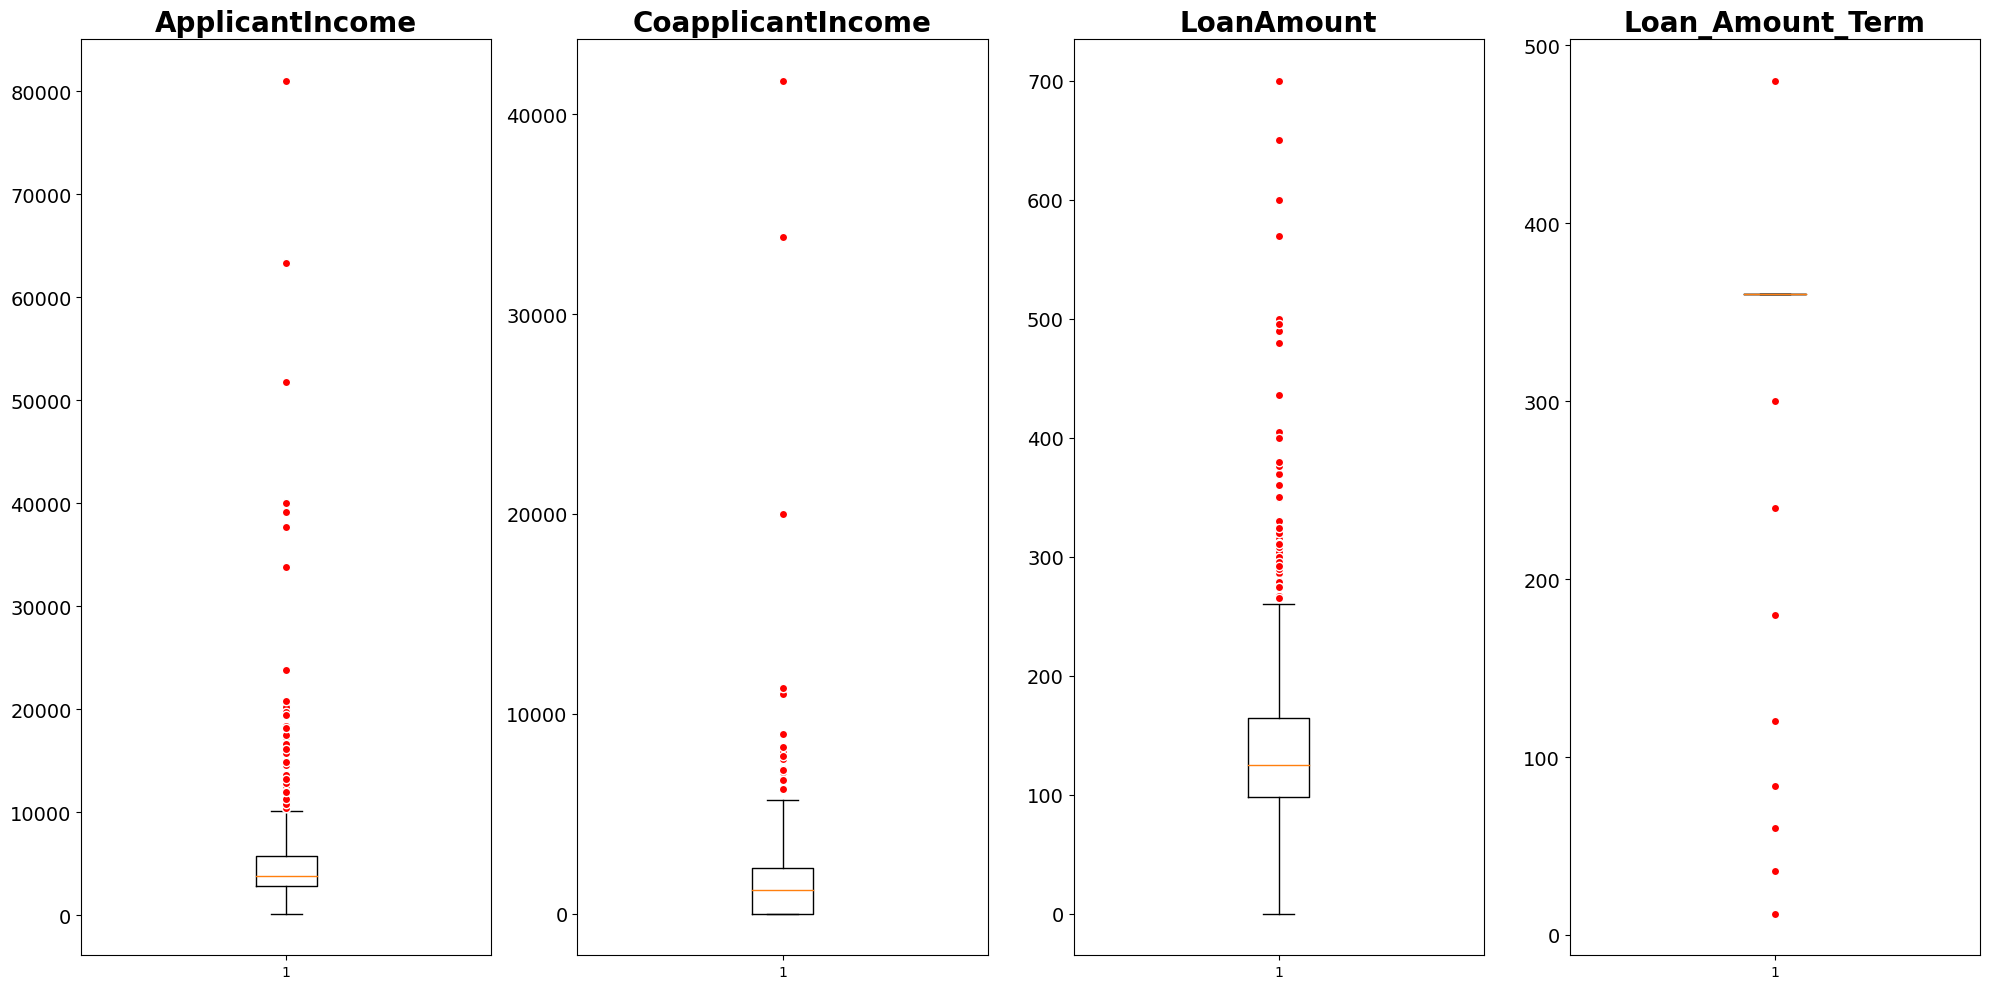

In [ ]:
red_circle=dict(markerfacecolor='red',marker='o',markeredgecolor='white')
fig,axs=plt.subplots(1,len(data[num_cols].columns),figsize=(20,10))
for i,ax in enumerate(axs.flat):
  ax.boxplot(data[num_cols].iloc[:,i],flierprops=red_circle)
  ax.set_title(data[num_cols].columns[i],fontsize=20,fontweight='bold')
  ax.tick_params(axis='y',labelsize=14)
plt.tight_layout()

 - There are outliers in all four numerical columns.
 - Outliers in Loan Terms can be ignored as its the different loan terms possible in Loan Process.

**Checking the skewness of Numerical columns**

In [ ]:
print(data['LoanAmount'].skew())
print(data['CoapplicantIncome'].skew())
print(data['ApplicantIncome'].skew())
print(data['Loan_Amount_Term'].skew())

2.3622744621460536
7.491531216657306
6.539513113994625
-2.4021122563890396


All variable are highly skewed.

**Bivariate Analysis and Multivariate Analysis**

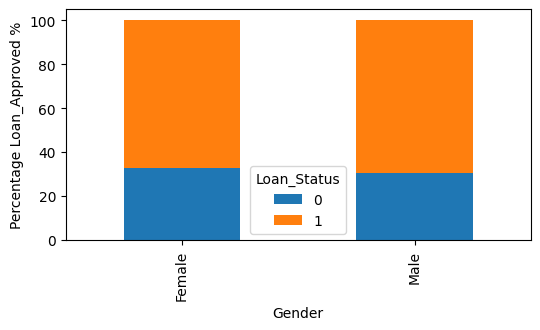

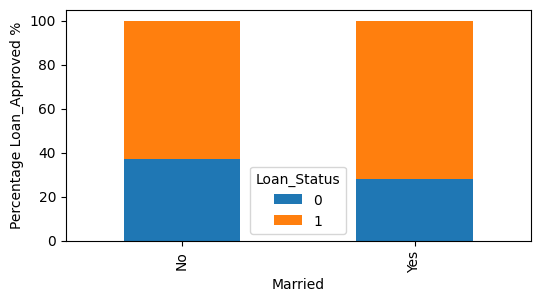

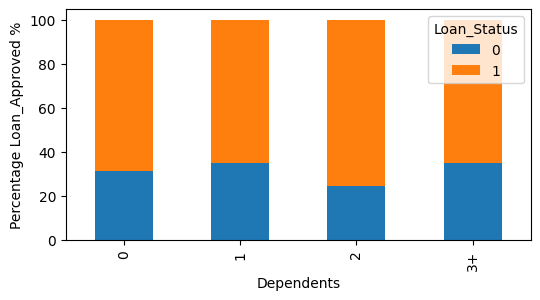

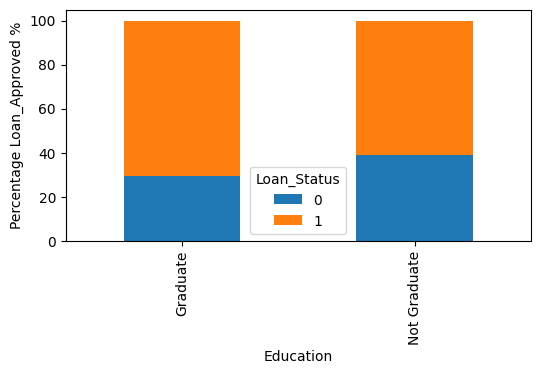

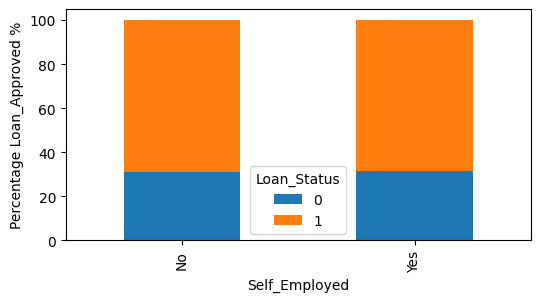

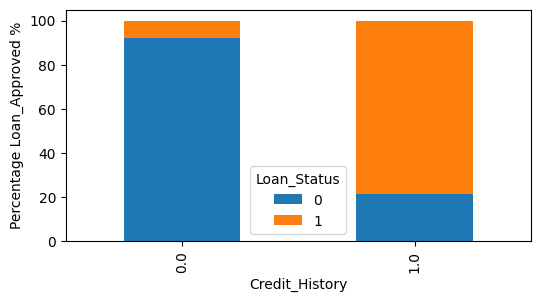

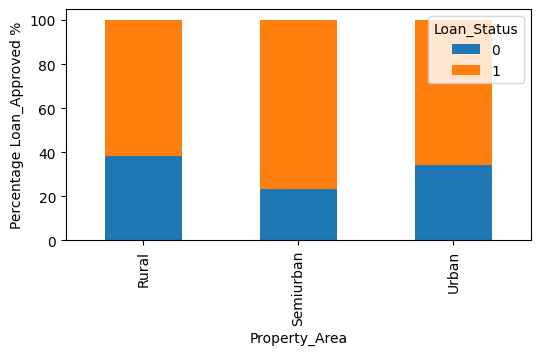

In [ ]:
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(6,3),stacked=True)
        plt.ylabel('Percentage Loan_Approved %')

Observation:

*   Overall, around 69% of the people successfully get loan

*   Considering gender, around 65% of male and female are successful in  
    getting a loan.

*   Married people have a slight edge(around 5%) over the unmarried people in
    getting a loan.
*   Graduates have a slight advantage over the non graduates in getting a loan.

*  Self employed or not, everyone gets almost the same percentage of loans
   (65%)
*  People with bad credit history have a bad chance at getting a loan(<10%)

*  whereas people with good credit history have a high success rate(>80%)









Let's check the relationship between attrition and Numerical variables

In [ ]:
data.groupby(['Loan_Status'])[num_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,344.56250
1,5384.068720,1504.516398,140.533175,341.43128


 - Approval for loan is for applicant lower relatively loan amount, loan amount term

**Creating Correlation Heatmap**

<Axes: >

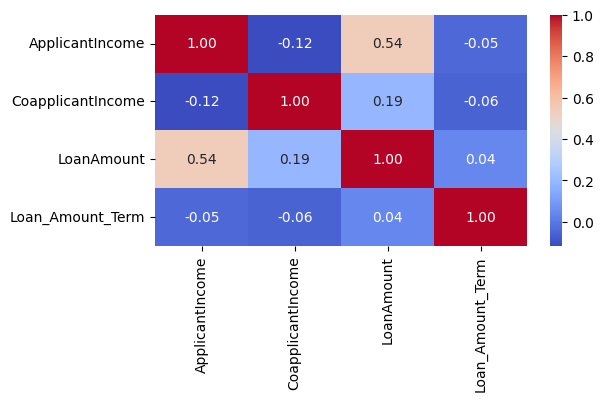

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='coolwarm')

There are no high correlation between numerical variables.(>0.7)

**Outliers removal**

Get dummies and replace for categorical variables

In [ ]:
to_get_dummies_for=['Dependents','Property_Area','Gender']

In [ ]:
data = pd.get_dummies(data = data, columns= to_get_dummies_for, drop_first= True)

In [ ]:
data['Married']=data['Married'].replace({'Yes':1,'No':0})

In [ ]:
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':0})

In [ ]:
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Education                614 non-null    int64  
 2   Self_Employed            614 non-null    int64  
 3   ApplicantIncome          614 non-null    int64  
 4   CoapplicantIncome        614 non-null    float64
 5   LoanAmount               614 non-null    int64  
 6   Loan_Amount_Term         614 non-null    float64
 7   Credit_History           614 non-null    float64
 8   Loan_Status              614 non-null    int64  
 9   Dependents_1             614 non-null    bool   
 10  Dependents_2             614 non-null    bool   
 11  Dependents_3+            614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
 14  Gender_Male              6

As per table all columns have numerical values

In [ ]:
data['Credit_History']=data['Credit_History'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Education                614 non-null    int64  
 2   Self_Employed            614 non-null    int64  
 3   ApplicantIncome          614 non-null    int64  
 4   CoapplicantIncome        614 non-null    float64
 5   LoanAmount               614 non-null    int64  
 6   Loan_Amount_Term         614 non-null    float64
 7   Credit_History           614 non-null    int64  
 8   Loan_Status              614 non-null    int64  
 9   Dependents_1             614 non-null    bool   
 10  Dependents_2             614 non-null    bool   
 11  Dependents_3+            614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
 14  Gender_Male              6

### Splitting the dependent and independent variable

In [ ]:
Y=data['Loan_Status']

In [ ]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

We will create logarithm columns of numerical columns to convert skewed distribution to normal distribution.This will help improving accuracy of linear models.

In [ ]:
l=np.log(data['Loan_Amount_Term'])
l2=np.sqrt(data['LoanAmount'])
l3=np.sqrt(data['CoapplicantIncome'])
l4=np.log(data['ApplicantIncome'])

X=data.drop(['Loan_Status','ApplicantIncome'],axis=1)
X['log_ApplicantIncome']=l4

# X=data.drop([])

- We have conducted multiple intertions for transformation(log and sqrt) on the variables and the best result were obtained with log transformation of Applicant Income.

In [ ]:
X_dt=data.drop('Loan_Status',axis=1)

As Decision Tree model doesn't require log transformation we will create X without it.

Best operation on numerical variable for getting best accuracy can be obtained by iterative process.

In [ ]:
X.head()

,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,log_ApplicantIncome
0,0,1,0,0.0,0,360.0,1,False,False,False,False,True,True,8.674026
1,1,1,0,1508.0,128,360.0,1,True,False,False,False,False,True,8.430109
2,1,1,1,0.0,66,360.0,1,False,False,False,False,True,True,8.006368
3,1,0,0,2358.0,120,360.0,1,False,False,False,False,True,True,7.856707
4,0,1,0,0.0,141,360.0,1,False,False,False,False,True,True,8.699515


### Scaling the Data:

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
sc=StandardScaler()
X_scaled_dt=sc.fit_transform(X_dt)
X_scaled_dt=pd.DataFrame(X_scaled_dt, columns=X_dt.columns)

In [ ]:
X_scaled

,Married,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,log_ApplicantIncome
0,-1.372089,0.528362,-0.392601,-0.554487,-1.599278,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147,0.472343,0.516199
1,0.728816,0.528362,-0.392601,-0.038732,-0.149160,0.273231,0.411733,2.240448,-0.443713,-0.300975,-0.782016,-0.700208,0.472343,0.137879
2,0.728816,0.528362,2.547117,-0.554487,-0.851561,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147,0.472343,-0.519352
3,0.728816,-1.892641,-0.392601,0.251980,-0.239792,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147,0.472343,-0.751478
4,-1.372089,0.528362,-0.392601,-0.554487,-0.001882,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,1.428147,0.472343,0.555733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-1.372089,0.528362,-0.392601,-0.554487,-0.794915,0.273231,0.411733,-0.446339,-0.443713,-0.300975,-0.782016,-0.700208,-2.117107,-0.571934
610,0.728816,0.528362,-0.392601,-0.554487,-1.146116,-2.522836,0.411733,-0.446339,-0.443713,3.322532,-0.782016,-0.700208,0.472343,-0.032585
611,0.728816,0.528362,-0.392601,-0.472404,1.266971,0.273231,0.411733,2.240448,-0.443713,-0.300975,-0.782016,1.428147,0.472343,1.015830
612,0.728816,0.528362,-0.392601,-0.554487,0.519254,0.273231,0.411733,-0.446339,2.253710,-0.300975,-0.782016,1.428147,0.472343,0.918903


Splitting the data in training and test set - 30 % Test, 70% Training set

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=42,stratify=Y)

In [ ]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X_scaled_dt,Y,test_size=0.3,random_state=42,stratify=Y)

### Defining the Metric_Score() Function

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Methods: Model Evaluation Criteria**
The model can make two types of wrong predictions:

*   Predicting that the loan can be approved when the customer is not really eligible for a loan
*   Predicting that the loan cannot be approved even when the customer is eligible for a loan

Which case is more important?

*   **False Positives:** Predicting that a customer can be approved for a loan even when the customer is not eligible leads to approving loans to customers who are not financially capable of repayment. This could lead to financial losses for the company. If minimizing losses is more important, reducing false positives is more important. In our case, reducing false positives is more important since the objective of the company is to prevent potential losses, save time and focus more on eligible customers.

*   **False Negatives:** Predicting that a loan cannot be approved even when the customer is eligible will lead to denying customers who are actually capable of repaying loans. This could be a missed opportunity for the company of losing a valuable customer. This might also create dissatisfaction among eligible customers who are applying for loans. If maximizing the number of loans is a priority, then reducing false negatives is more important.


Model can be evaluated based on accuracy of the model, precision and the feature importance:


*   Accuracy, Precision and the important feature variables have been changing when the models are tuned using grid search hyperparameter tuning. In order to increase loans that are authorized, model parameters may need to be adjusted to prioritize lowering false positives. Precision shows ratio of correctly predicted positive observations to the total predicted positives. Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
*   More focus was given to increasing the accuracy and precision of the model and the final model has high accuracy of around 86%. This is the ratio of correctly predicted observation to the total observations.


#### Building the model

We will be building 3 different models:
- **Logistic Regression**
- **K-NN (K-Nearest Neighbors)**
- **Decision Tree**

**LOGISTIC REGRESSION MODEL**

Second model we are going to use is Logistics Regression:
Logistic Regression is a supervised learning algorithm which is used for binary classification problems i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:
        P(y)=1/exp(1 + exp(-x))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
y_pred_lr=lr.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.91      0.38      0.54       134
           1       0.78      0.98      0.87       295

    accuracy                           0.79       429
   macro avg       0.84      0.68      0.70       429
weighted avg       0.82      0.79      0.76       429



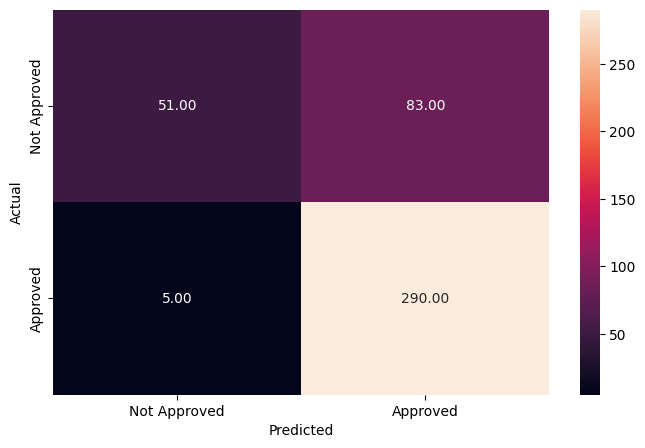

In [ ]:
y_train_pred_lr=lr.predict(X_train)
metrics_score(y_train,y_train_pred_lr)

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        58
           1       0.84      0.97      0.90       127

    accuracy                           0.85       185
   macro avg       0.87      0.78      0.80       185
weighted avg       0.85      0.85      0.84       185



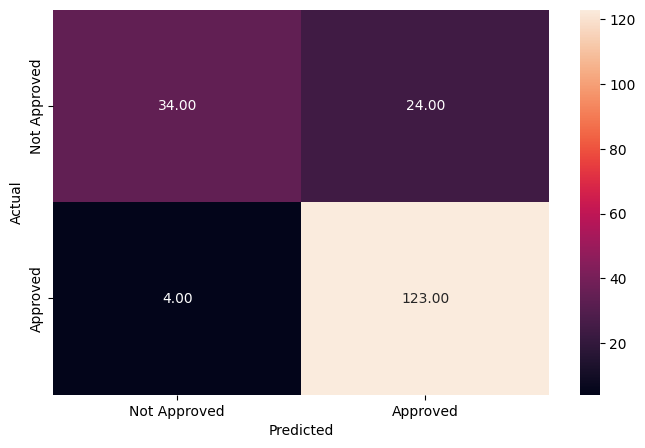

In [ ]:
y_test_pred_lr=lr.predict(X_test)
metrics_score(y_test,y_test_pred_lr)

 - The model is giving better performance on the test data than train data i.e. the model will generalize well.
 - We are getting an accuracy of around 85% on test set and 79% on train dataset.
 - The recall for this model is 97% and precision is 84% on test data which is very good as we have still not performed any tuning on the models.

In [ ]:
cols=X_scaled.columns

coef_lg=lr.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Credit_History,1.249419
Property_Area_Semiurban,0.402396
Married,0.253917
Dependents_2,0.237925
Education,0.214832
Dependents_3+,0.116223
Property_Area_Urban,0.091481
LoanAmount,0.081934
Loan_Amount_Term,-0.024265
Gender_Male,-0.029849


Features which string positive affect on the Loan Approval are:
1.   Credit History
2.   SemiUrban Property Area
3.   Married
4.   Dependents with 2 Number
5.   Education
6.   Dependents with more than 3
7.   Property in Urban Area
8.   Loan Amount


Features which string negative affect on the Loan Approval are:
1.   Loan Amount Term
2.   Gender_Male
3.   Self_Employed
4.   Applicant Income
5.   Dependents with 1
6.   CoapplicantIncome



In [ ]:
odds = np.exp(lr.coef_[0])
importance_lr_df=pd.DataFrame(odds, X_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)
importance_lr_df

,odds
Credit_History,3.488315
Property_Area_Semiurban,1.495403
Married,1.289065
Dependents_2,1.268614
Education,1.239653
Dependents_3+,1.123247
Property_Area_Urban,1.095796
LoanAmount,1.085384
Loan_Amount_Term,0.976027
Gender_Male,0.970592


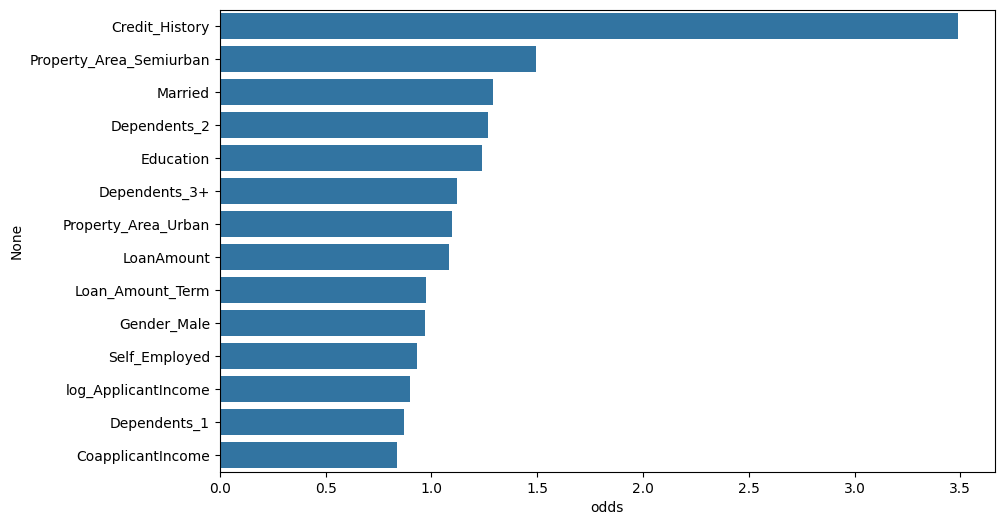

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance_lr_df.odds, y=importance_lr_df.index)
plt.show()

- The odds of credit score on to get loan approved is about 3.5 times than who doesnot have good score, this is obvious as credit score is a good indicator of borrowing tendincy of the customer.
- The odds of an customer to get loan approved by having property in Semi urban area is 1.5 times than who doesn't.
- Other variables has almost the similar odds of having loan approved.
- Many top features identified in Logistics regression differ from that Decision tree
- Many top features seems irrevalent when comapared to actual loan approval factors

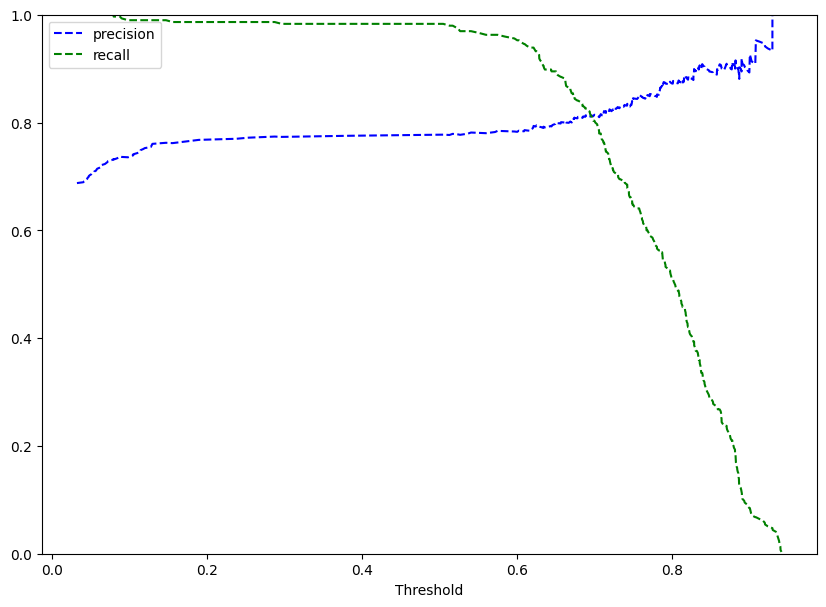

In [ ]:
y_scores_lr=lr.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label='precision')
plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

We can change the threshold to 0.7 to get best tradeoff between precsion and recall score

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       134
           1       0.81      0.80      0.81       295

    accuracy                           0.74       429
   macro avg       0.69      0.70      0.70       429
weighted avg       0.74      0.74      0.74       429



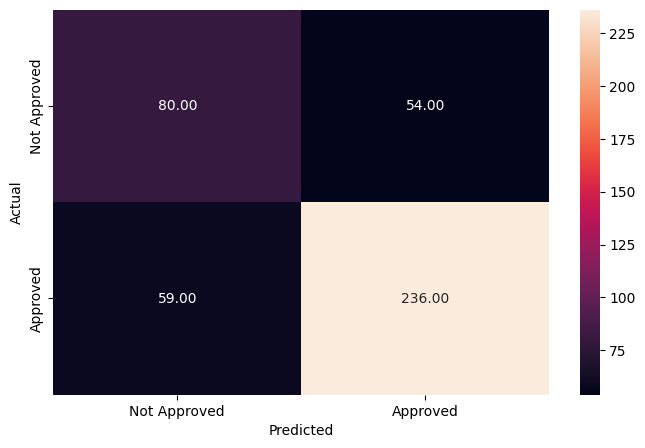

In [ ]:
optimal_threshold1=.7
y_pred_train_lr_thres = lr.predict_proba(X_train)
metrics_score(y_train, y_pred_train_lr_thres[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.58      0.67      0.62        58
           1       0.84      0.78      0.81       127

    accuracy                           0.75       185
   macro avg       0.71      0.73      0.72       185
weighted avg       0.76      0.75      0.75       185



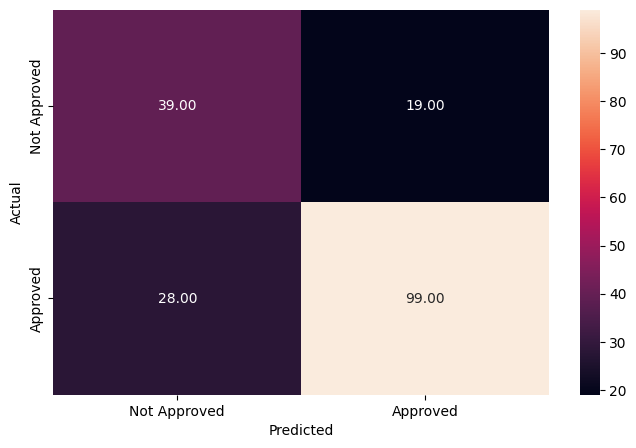

In [ ]:
optimal_threshold1=.7
y_pred_test_lr_thes = lr.predict_proba(X_test)
metrics_score(y_test, y_pred_test_lr_thes[:,1]>optimal_threshold1)

We still have 84% precision score, thus changing threshold is not improving our model capability

In [ ]:
# Choose the type of classifier.
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score,precision_score
from sklearn.model_selection import GridSearchCV
lr_estimator = LogisticRegression()

# Grid of parameters to choose from
parameters_lr = {'solver': ['newton-cg','lbfgs','liblinear','saga'],
              'penalty': ['l2','l1'],
              'C':[100,10,1.0,0.1,0.01,0.001],
              'max_iter':[200,500]
                 }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(precision_score, pos_label=1)

# Run the grid search
gridCV_lr= GridSearchCV(lr_estimator, parameters_lr,cv=10,scoring=scorer)
gridCV_lrr = gridCV_lr.fit(X_train, y_train)

# Set the clf to the best combination of parameters
lr_estimator = gridCV_lrr.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train, y_train)

LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')

              precision    recall  f1-score   support

           0       0.91      0.38      0.54       134
           1       0.78      0.98      0.87       295

    accuracy                           0.79       429
   macro avg       0.84      0.68      0.70       429
weighted avg       0.82      0.79      0.76       429



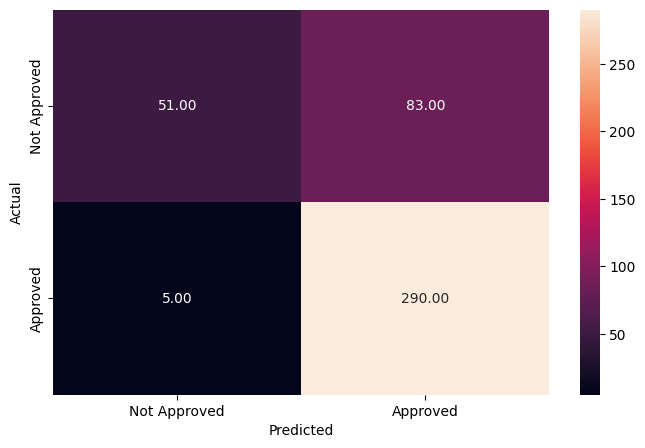

In [ ]:
y_train_pred_lr_tune=lr_estimator.predict(X_train)
metrics_score(y_train,y_train_pred_lr_tune)

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        58
           1       0.84      0.98      0.91       127

    accuracy                           0.86       185
   macro avg       0.89      0.79      0.81       185
weighted avg       0.87      0.86      0.85       185



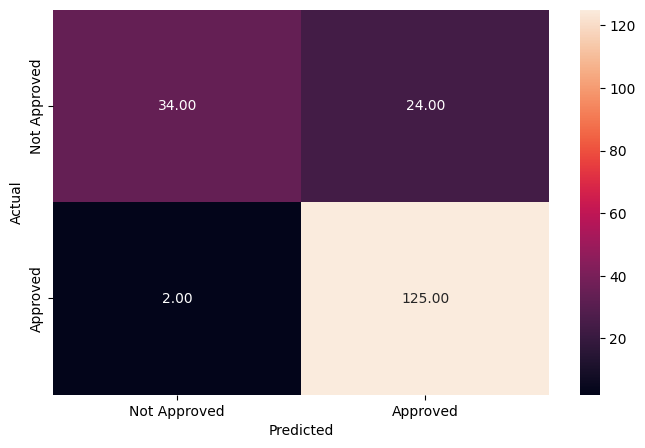

In [ ]:
y_test_pred_lr_tune=lr_estimator.predict(X_test)
metrics_score(y_test,y_test_pred_lr_tune)

 - With hyper parameter tuned model we able to improve accuracy by 1% at 86% but we improve recall score at 98%.
 - However the precision score is still at 84%.

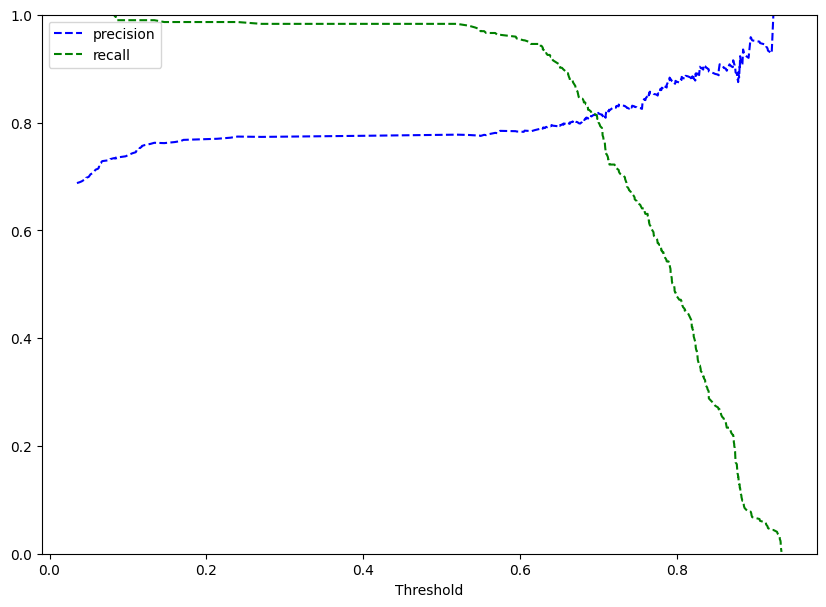

In [ ]:
y_scores_lr_estimator=lr_estimator.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lr_estimator, recalls_lr_estimator, thresholds_lr_estimator = precision_recall_curve(y_train, y_scores_lr_estimator[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lr_estimator, precisions_lr_estimator[:-1], 'b--', label='precision')
plt.plot(thresholds_lr_estimator, recalls_lr_estimator[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        58
           1       0.84      0.80      0.82       127

    accuracy                           0.76       185
   macro avg       0.72      0.73      0.73       185
weighted avg       0.77      0.76      0.76       185



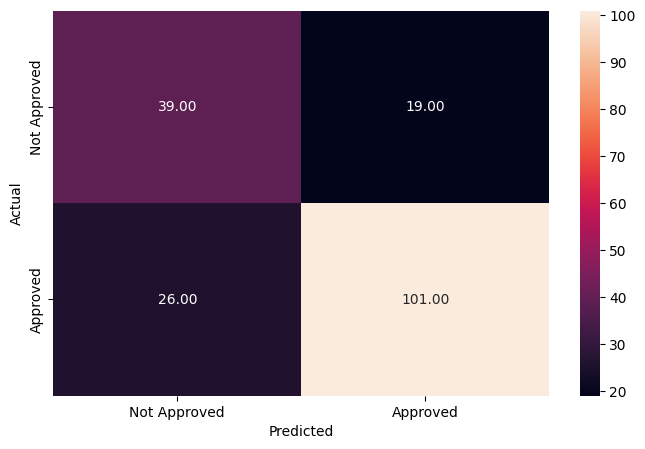

In [ ]:
optimal_threshold1_lr_estimator=.7
y_pred_test_lr_thes_estimator = lr_estimator.predict_proba(X_test)
metrics_score(y_test, y_pred_test_lr_thes_estimator[:,1]>optimal_threshold1_lr_estimator)

We don't see much change in precision, thus our hyperparameter tuned logistic regression is best trade off between precision and accuracy.

In [ ]:
cols_lg=X_scaled.columns
coef_lg_estimator=lr_estimator.coef_
pd.DataFrame(coef_lg_estimator,columns=cols_lg).T.sort_values(by=0,ascending=False)

,0
Credit_History,1.252427
Property_Area_Semiurban,0.375354
Married,0.241552
Dependents_2,0.218475
Education,0.196777
Dependents_3+,0.100891
Property_Area_Urban,0.065815
LoanAmount,0.033135
Loan_Amount_Term,-0.002318
Gender_Male,-0.007357


                             odds
Credit_History           3.498823
Property_Area_Semiurban  1.455507
Married                  1.273224
Dependents_2             1.244178
Education                1.217472
Dependents_3+            1.106156
Property_Area_Urban      1.068030
LoanAmount               1.033690
Loan_Amount_Term         0.997685
Gender_Male              0.992670
log_ApplicantIncome      0.950569
Self_Employed            0.940916
Dependents_1             0.880405
CoapplicantIncome        0.872375


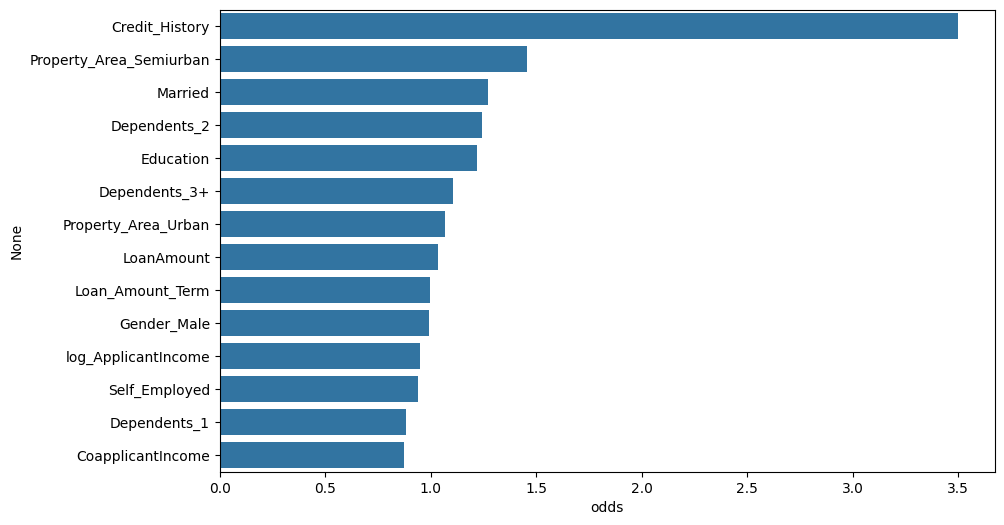

In [ ]:
odds = np.exp(lr_estimator.coef_[0])

# adding the odds to a dataframe and sorting the values
importance_lr_estimator_df=pd.DataFrame(odds, X_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)
print(importance_lr_estimator_df)
plt.figure(figsize=(10,6))
sns.barplot(x=importance_lr_estimator_df.odds, y=importance_lr_estimator_df.index)
plt.show()

Feature coefficients have same similar order of importance of as untuned Logistics regression model.

### K-NN (K-Nearest Neighbour)

The K-Nearest Neighbors algorithm (K-NN) is a method used for classification/regression. In both cases, the input consists of the k closest training examples in the feature space.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#initialize knn
knn = KNeighborsClassifier()

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.84      0.49      0.62       134
           1       0.80      0.96      0.87       295

    accuracy                           0.81       429
   macro avg       0.82      0.72      0.75       429
weighted avg       0.82      0.81      0.79       429



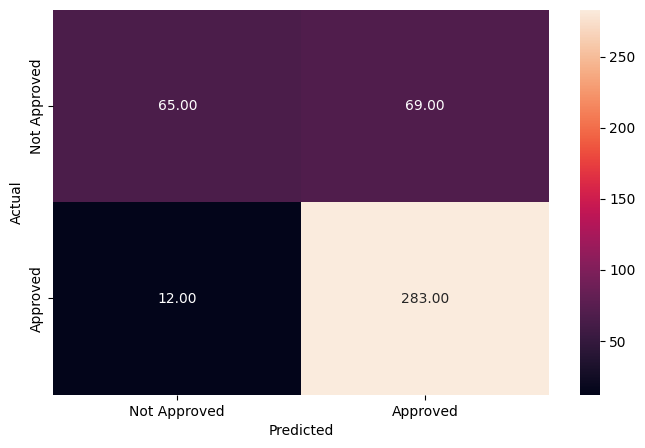

In [ ]:
# Predictions on training set
y_train_pred_knn = knn.predict(X_train)

# Model evaluation on training set
metrics_score(y_train, y_train_pred_knn)

- The recall for this model is 96% and precision is 80% on train data.

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        58
           1       0.81      0.94      0.87       127

    accuracy                           0.81       185
   macro avg       0.80      0.73      0.75       185
weighted avg       0.80      0.81      0.79       185



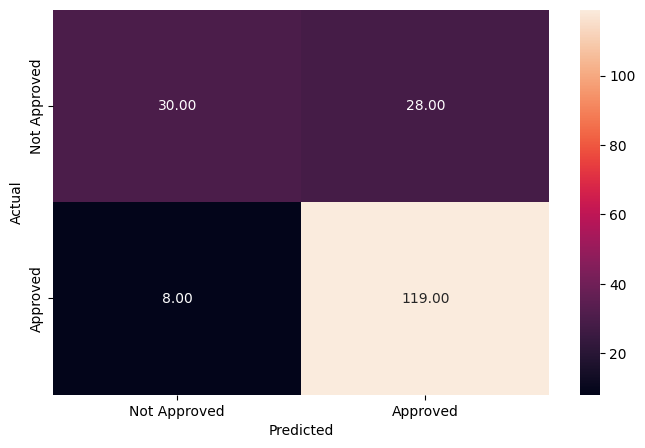

In [ ]:
# Predictions on test set
y_test_pred_knn = knn.predict(X_test)

# Model evaluation on test set
metrics_score(y_test, y_test_pred_knn)

- We are getting an accuracy of around 81% on both test set and train dataset.
- The recall for this model is 94% and precision is 81% on test data which is very good as we have still not performed any tuning on the models.

**Split the data into training and testing sets**

In [ ]:
# Assuming you have your data in X and y
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the KNN model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Feature importance using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get selected feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

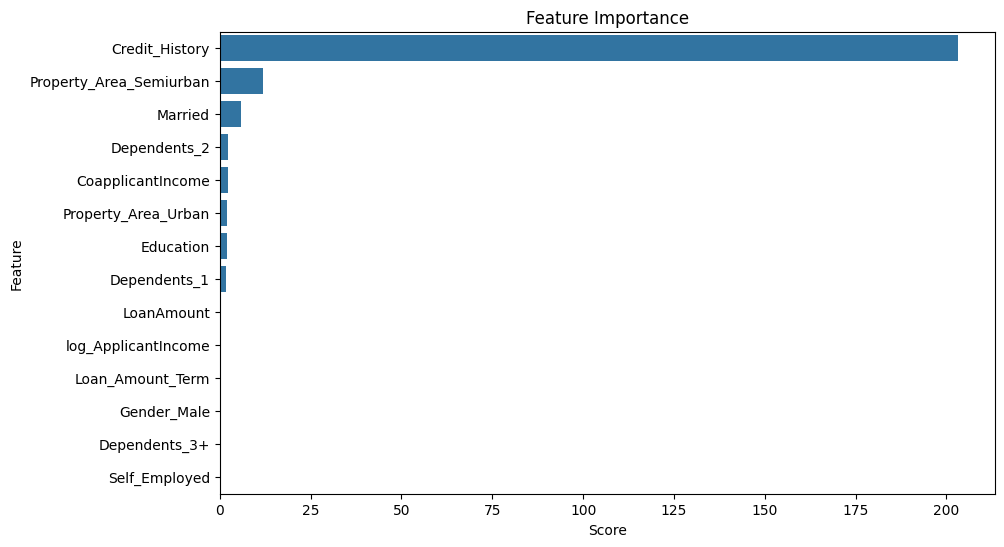

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

**Hyperparameter Tuning**

Change parameters of model to reduce overfitting and model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40, 50],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Evaluate the best model
train_accuracy = best_estimator.score(X_train_scaled, y_train)
test_accuracy = best_estimator.score(X_test_scaled, y_test)


Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.34      0.41      0.37       149
           1       0.72      0.66      0.69       342

    accuracy                           0.58       491
   macro avg       0.53      0.53      0.53       491
weighted avg       0.60      0.58      0.59       491



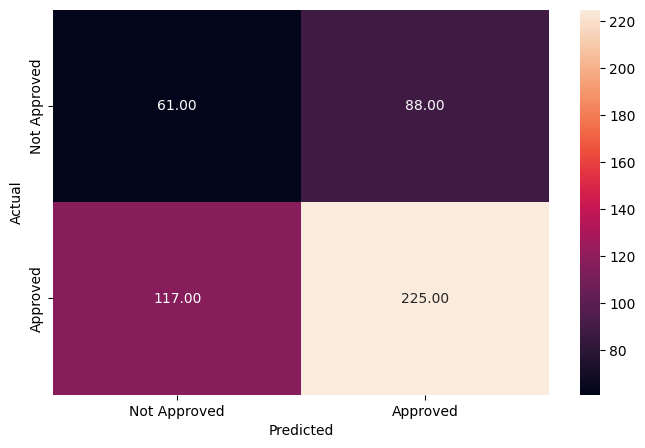

In [ ]:
y_train_pred_knn_tuned = best_estimator.predict(X_train)
metrics_score(y_train, y_train_pred_knn_tuned)

After hyperparamter tuning, the model gives 58% accuracy on train data.
Precision and Recall are at 72% and 66% respectively.

              precision    recall  f1-score   support

           0       0.40      0.42      0.41        43
           1       0.68      0.66      0.67        80

    accuracy                           0.58       123
   macro avg       0.54      0.54      0.54       123
weighted avg       0.58      0.58      0.58       123



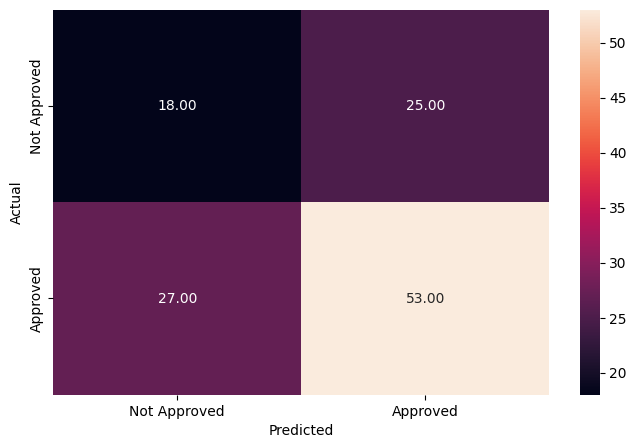

In [ ]:
y_test_pred_knn_tuned = best_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_knn_tuned)

After hyperparamter tuning, the model gives 58% accuracy on test data.
Precision and Recall are at 68% and 66% respectively.

With hyperparameter tuning, the model's accuracy, precision, and recall reduced drastically. This suggests the model performs better before tuning.

### Decision Tree
- Decision Tree is a supervised segmentation algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. The data is recursively partitioned to achieve maximum homogeneity of partitions (minimal entropy/gini impurity) with respect to the target variable.

In [ ]:
#building decision tree
dt = DecisionTreeClassifier(random_state=1)

#fitting decision tree
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=1)

Create column of predictions using testing data

In [ ]:
y_pred = dt.predict(X_test_dt)
y_pred[:6]

array([1, 1, 1, 1, 0, 1])

**Check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       295

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



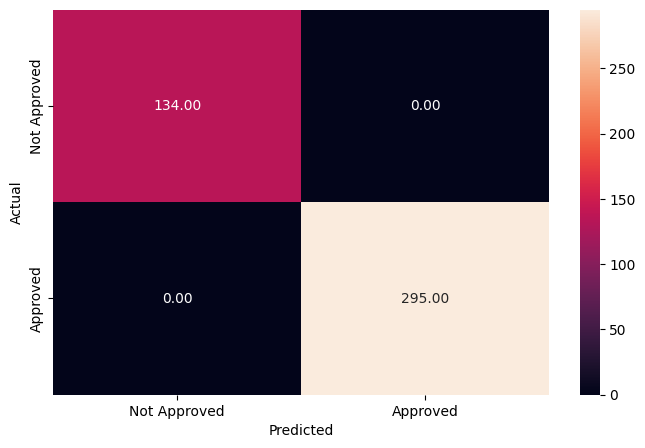

In [ ]:
#checking performance on train dataset
y_train_pred_dt=dt.predict(X_train_dt)
metrics_score(y_train_dt,y_train_pred_dt)

We are getting 100% accuracy on train data. This may be a case of overfitting which can be checked with test data accuracy.

**Check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.53      0.71      0.61        58
           1       0.84      0.72      0.77       127

    accuracy                           0.71       185
   macro avg       0.69      0.71      0.69       185
weighted avg       0.75      0.71      0.72       185



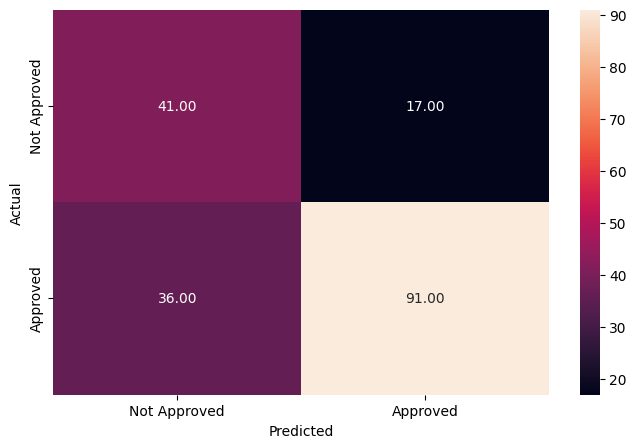

In [ ]:
#checking model performace of dt
y_pred_test_dt = dt.predict(X_test_dt)
metrics_score(y_test_dt, y_pred_test_dt)

 - The model gives an accuracy score of 100% on training data and 71% accuracy score on test.
 - Clearly indicating the models **Overfits** and thus fails to generalise on unseen data.
 - Recall score is 72% which is quite good we will fairly able to predict loans which were actually approved.
 - Precision score is 84% which is fairly good score which means that model correctly predicts 84% approved loans (91 out of 109(91+17) cases).

### Examine the Feature Importance of the Variables based on initial model.

---



In [ ]:
importances_table = pd.DataFrame(data={
    'Attribute': X_train_dt.columns,
    'Importance': dt.feature_importances_
})

importances_table = importances_table.sort_values(by='Importance', ascending=False)
importances_table

,Attribute,Importance
7,Credit_History,0.243806
3,ApplicantIncome,0.189138
5,LoanAmount,0.188184
4,CoapplicantIncome,0.177110
1,Education,0.047726
6,Loan_Amount_Term,0.038391
11,Property_Area_Semiurban,0.026539
9,Dependents_2,0.024418
2,Self_Employed,0.018540
0,Married,0.013489


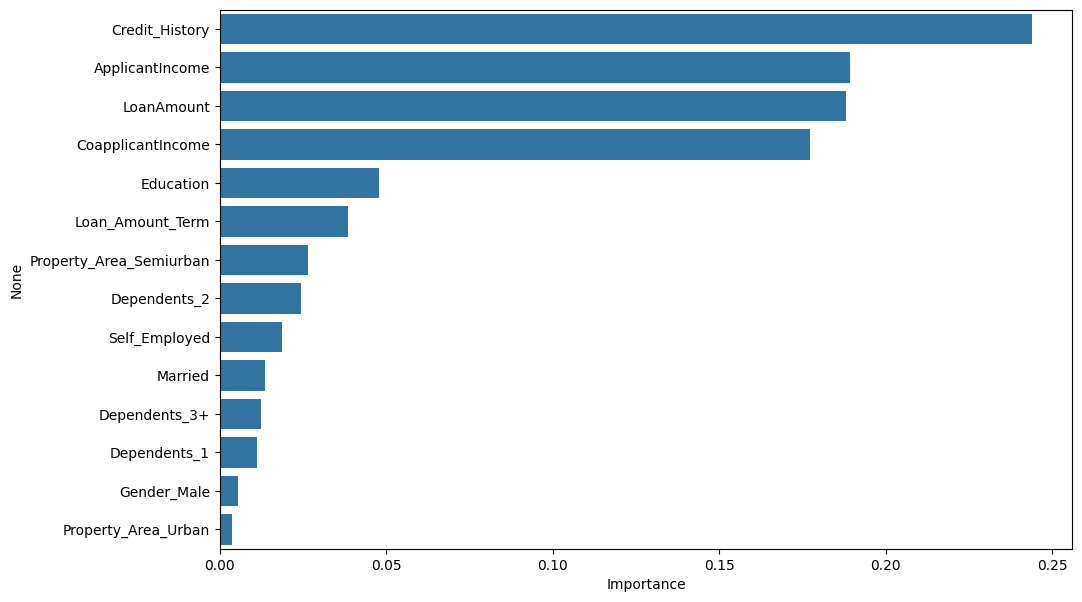

In [ ]:
#plotting the importance plot
importances = dt.feature_importances_
columns=X_dt.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(11,7))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.show()

 - Initial model suggests that applicant income, credit history, LoanAmount, co applicant income as top features determining loan prediction.
 - The bar plot depicts the value of each feature in the model's decision-making process.
 - In developing forecasts, features with higher bars are regarded more essential. The plot determines these features to be the most relevant in determining loan acceptance based on the trained Decision Tree model.

### Hyperparameter tuning

Change parameters of model to reduce overfit and increase model performance.

In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
# Choose the type of classifier.
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score,precision_score
from sklearn.model_selection import GridSearchCV
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,20),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25,30],
              }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(precision_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters,cv=10,scoring=scorer)
gridCV = gridCV.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

In [ ]:
gridCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

In [ ]:
gridCV.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.82      0.49      0.62       134
           1       0.81      0.95      0.87       295

    accuracy                           0.81       429
   macro avg       0.82      0.72      0.74       429
weighted avg       0.81      0.81      0.79       429



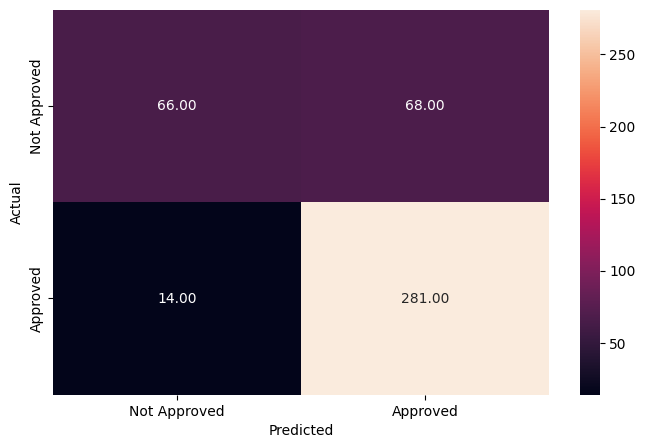

In [ ]:
y_train_pred_dt_tuned=dtree_estimator.predict(X_train_dt)
metrics_score(y_train_dt,y_train_pred_dt_tuned)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        58
           1       0.83      0.87      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.74      0.75       185
weighted avg       0.78      0.79      0.79       185



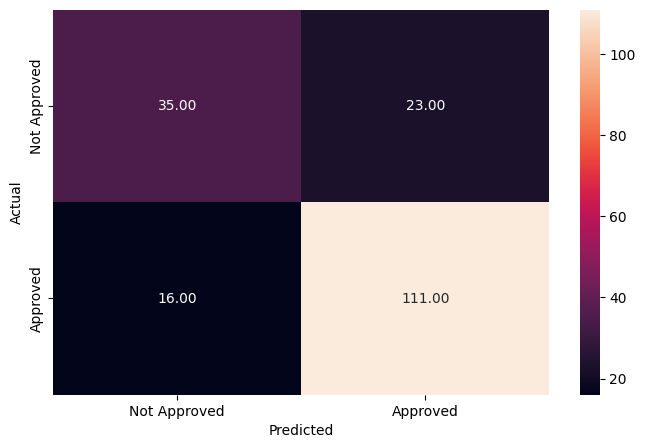

In [ ]:
y_test_pred_dt_tuned=dtree_estimator.predict(X_test_dt)
metrics_score(y_test_dt,y_test_pred_dt_tuned)

###Feature Importance for the improved DT model.

<Axes: xlabel='Importance', ylabel='None'>

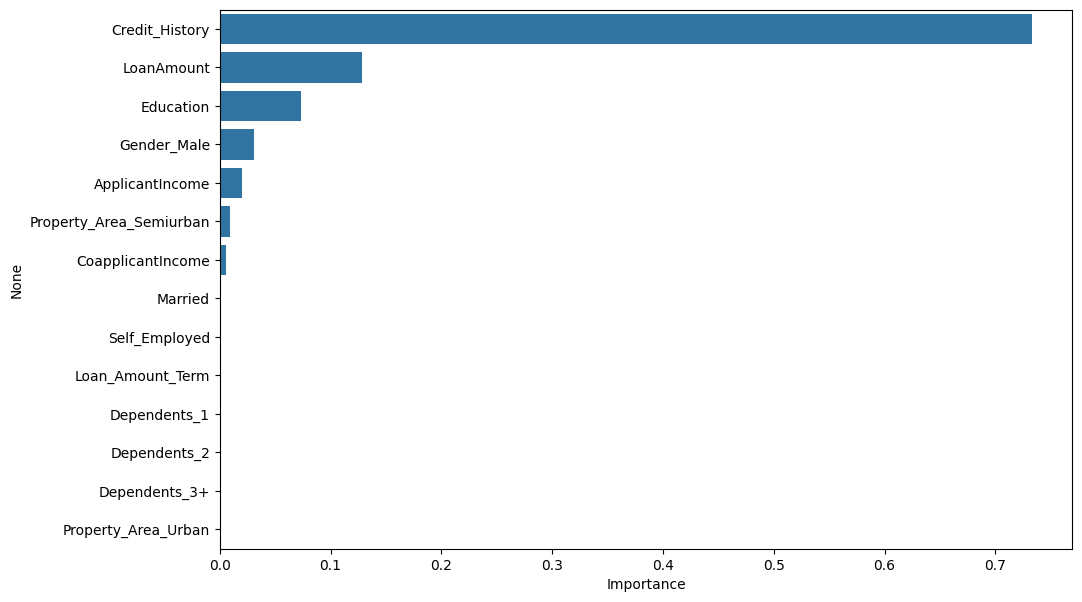

In [ ]:
importances_dtree_estimator = dtree_estimator.feature_importances_
columns=X_dt.columns
importance_df_dtree_estimator=pd.DataFrame(importances_dtree_estimator,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(11,7))
sns.barplot(x=importance_df_dtree_estimator.Importance,y=importance_df_dtree_estimator.index)

- Tuned DT emphasises only on 6 feaures compare to untuned DT. Credit rating
- Loan amount are still the important features in both models.
- Education has improved importance now comapred to earlier model
- Cooapllicant income has signficantly less importance now compared to old model

### Result:

Below Table gives performance comparison between Logistic regression, K-NN model and Decision Tree:

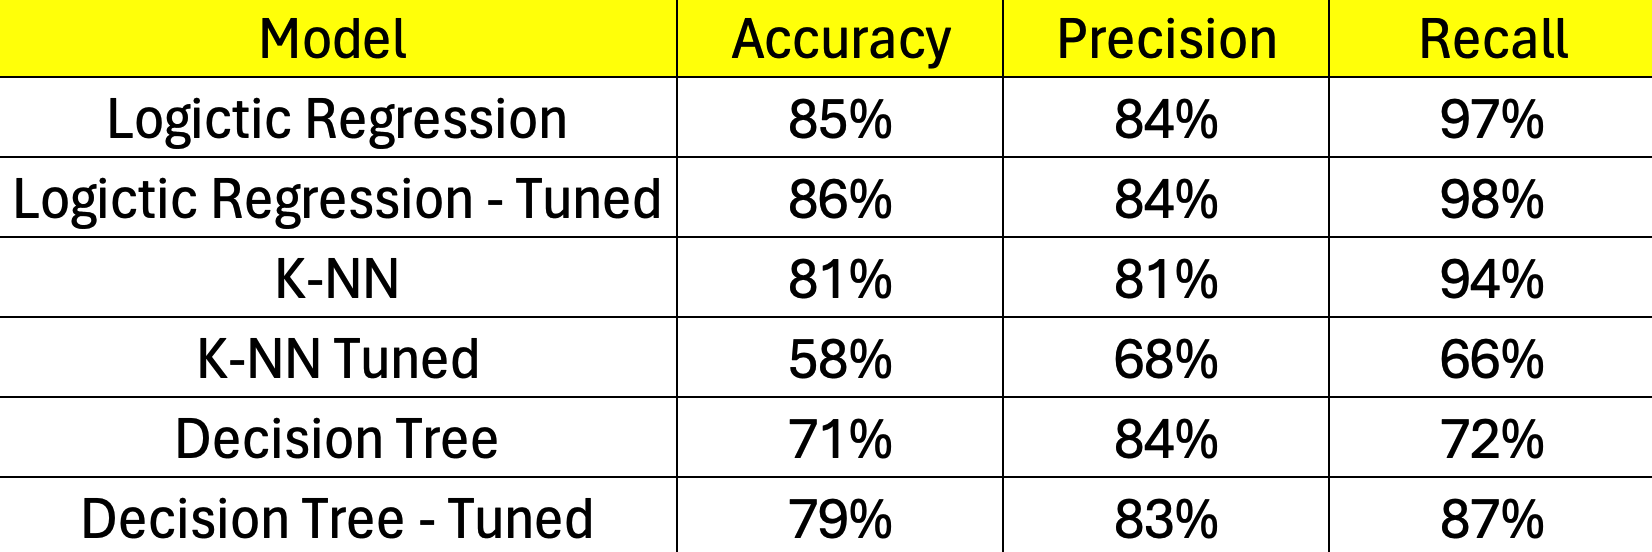

- Logistic regression is performing better than K-NN model and Decision Tree on all parameters. Bank can use the Logistic Regression model to predict loan approval for new data set.​

- The Precision score achieved by all three models is similar except for K-NN Tuned model.

- Feature Importance's by Decision Tree is better for recommendations as they are more relevant and in line with actual bank procedures to approve actual home loans(than what pointed out by Logistic Regression model)​

- Decision Tree feature importance can help the bank in deciding the main factors affecting loan approval.